# <p style="background-color:green; font-family:calibri; font-size:120%; text-color:white; text-align:center;color:white" id="data"> FINAL PROJECT (NLP - Module 508)</p>

In [2]:
from IPython.display import HTML

header = """
<img src="https://www.gisma.com/media/1198/gisma-business-school-logo.svg" 
width="240" height="240"style="margin-left:auto ;margin-right:auto "/>'
"""
HTML(header)

<IPython.core.display.Javascript object>

# <p style="background-color:green; font-family:calibri; font-size:120%; text-color:white; text-align:center;color:white" id="data"> Business Problem Understanding</p>

In today’s world, the use of social media has become increasingly popular as a means of communication and information exchange. This has resulted in the emergence of new challenges for businesses that need to be able to understand the sentiment of public opinion about their products, services, and brand.

The objective of this project is to develop a Python pipeline to collect public tweets and use machine learning techniques to analyze the sentiment of these tweets. The pipeline will collect tweets from a variety of sources, including Twitter, and store them in a table. Once collected, the dataset will then be used to analyze the sentiments of the tweets. It will be able to identify the positive, negative, and neutral sentiments of the tweets.

The data gathered from this pipeline will be used to inform businesses of the public opinion on their products and services in general. This will be done by providing a sentiment analysis of the tweets mostly around movies and cinema reviews, allowing businesses to better understand how their products and services are being received by the public. This understanding can be used to help businesses make decisions about the way they communicate with their customers or audience, as well as their overall marketing strategy.

In addition, the data gathered from this pipeline can be used in other ways, such as to identify trends in public opinion. This could be beneficial in helping businesses to better understand how their products and services are being perceived by the public, as well as to identify any areas where improvement is needed.

Finally, the data gathered from this pipeline can also be used in the development of machine learning models. This could be beneficial in helping businesses to better understand the sentiment of public opinion, as well as to identify any potential issues that could arise from the use of their products and services which in this specific topic we fetch tweets around the movies.

Overall, the project will be able to identify the positive, negative, and neutral sentiments of the tweets, and can also be used in the development of machine learning models. This pipeline has the potential to provide businesses with valuable insight into public opinion about their products and services, which can in turn be used to inform their overall marketing strategy.

**To able to load dataset without running the twitter API from section 2.1 you can download created DB from below link**
* Place it at the running code same folder:

https://drive.google.com/drive/folders/11z2srRvm7ed0rTOK3b6zsrKXqcxTKcRa?usp=share_link


# <p style="background-color:green; font-family:calibri; font-size:120%; text-align:center;color:white" id="data"> 1. Importing Libraries</p>

<a id="dataprep"></a>

In [35]:
import pandas as pd
import numpy as np
import tweepy as tw
import configparser
import sqlite3

import matplotlib.pyplot as plt

import sklearn.metrics
import sklearn.model_selection
import sklearn.ensemble

import nltk
import re

from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

<IPython.core.display.Javascript object>

Above libraries are used for a variety of tasks related to data analysis and machine learning. Pandas and Numpy are used for data manipulation and analysis. Tweepy is used for interacting with the Twitter API. The configparser library is used for accessing configuration files. Sklearn is a library for machine learning, including regression, classification, clustering, and more. Matplotlib is a library for data visualization. NLTK is a library for natural language processing. Gensim is a library for topic modeling. The VADER sentiment analysis library is used for sentiment analysis. The CountVectorizer and TfidfVectorizer libraries are used for feature extraction. Logistic regression and linear SVC are used for classification. The cross_val_score, classification_report, confusion_matrix, and accuracy_score libraries are used for model evaluation. Finally, the plot_roc_curve library is used to generate a ROC curve.

---

In [4]:
nltk.download("stopwords")
nltk.download("omw-1.4")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HAdel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HAdel\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HAdel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<IPython.core.display.Javascript object>

Above codes are used to download various data sets and libraries necessary for natural language processing tasks. The first line downloads the stopwords data set, which contains a list of commonly used words that are not useful for analysis. The second line downloads the Open Multilingual Wordnet (OMW) 1.4, which is a multilingual lexical database of word meanings. The third line downloads the Wordnet lemmatizer, which is used to reduce words to their base form. All of these tools are needed for natural language processing tasks such as text classification.

# <p style="background-color:green; font-family:calibri; font-size:120%; text-align:center;color:white" id="data">2. Reading Tweets</p>

<a id="dataprep"></a>

**Read Config File**

In [6]:
config = configparser.ConfigParser()
config.read("config.ini")

api_key = config["twitter"]["api_key"]
api_key_secret = config["twitter"]["api_key_secret"]

access_token = config["twitter"]["access_token"]
access_token_secret = config["twitter"]["access_token_secret"]

bearer_token = config["twitter"]["bearer_token"]

<IPython.core.display.Javascript object>

The above block code is used to read and store the Twitter API credentials from a config.ini file. The config.ini file contains Twitter API keys and access tokens which are used to authenticate a user's requests when using the Twitter API. The code uses the configparser module to parse the config.ini file and store the credentials in variables. The variables are then used to authenticate requests when using the Twitter API.

---

**Authentication**

In [8]:
auth = tw.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth)

<IPython.core.display.Javascript object>

The above block code is used to authenticate a user's requests when using the Twitter API. The tw.OAuthHandler() method requires two parameters: the API key and the API key secret. These are the credentials obtained from the config.ini file. The set_access_token() method requires two parameters: the access token and the access token secret. These are also obtained from the config.ini file. The API() method is used to create an instance of the Twitter API, which is used to make requests.

---

**Getting tweets**

In [9]:
tweet_max = 2000
hashtag = "#film"

conn = sqlite3.connect("tweets.db")
c = conn.cursor()

c.execute(
    """
    CREATE TABLE IF NOT EXISTS tweets
        (
        author text, user text, text text, created_at text,
        retweet_count int, favorite_count int
        )
    """
)

for tweet in tw.Cursor(api.search_tweets, q=hashtag, lang="en").items(tweet_max):
    c.execute(
        "INSERT INTO tweets VALUES (?, ?, ?, ?, ?, ?)",
        (
            tweet.author.screen_name,
            tweet.user.name,
            tweet.text,
            tweet.created_at,
            tweet.retweet_count,
            tweet.favorite_count,
        ),
    )

conn.commit()
conn.close()

<IPython.core.display.Javascript object>

The above block code is used to extract tweets with a specific hashtag and store them in a sqlite3 database. The tweet_max variable is used to specify the maximum number of tweets to be extracted, and the hashtag variable is used to specify the hashtag that should be searched for. The sqlite3.connect() method is used to create a sqlite3 database, and the c.execute() method is used to create a table if it does not already exist. The tw.Cursor() method is used to extract tweets, and the c.execute() method is used to store the tweets in the database. Finally, the conn.commit() method is used to save the changes, and the conn.close() method is used to close the connection.

---

**2.1 Read the tweets from internal DB**

In [5]:
conn = sqlite3.connect("tweets.db")
c = conn.cursor()

c.execute("SELECT * FROM tweets")

rows = c.fetchall()

df = pd.DataFrame(
    rows,
    columns=["author", "user", "text", "created_at", "retweet_count", "favorite_count"],
)
conn.close()

<IPython.core.display.Javascript object>

The above block code is used to read data from a sqlite3 database and store it in the "df" dataset. The sqlite3.connect() method is used to create a connection to the database, and the c.execute() method is used to select the data from the table. The c.fetchall() method is used to fetch all the rows from the table, and the pandas.DataFrame() method is used to create a dataframe. Finally, the conn.close() method is used to close the connection.

---

In [6]:
print("Data Frame Size:", df.shape)

df.head(3)

Data Frame Size: (3861, 6)


,author,user,text,created_at,retweet_count,favorite_count
0,HLfavorito6,HL Social Networks ,RT @WriterWoodrow: Full Metal Bitch\nhttps://t...,2022-12-22 01:26:23+00:00,6,0
1,RaidenKozmik,Burn Factory,#movies #movie Jurassic Punk. #cgi #animation ...,2022-12-22 01:23:30+00:00,0,0
2,PennilessScribe,Ken Stark,RT @WriterWoodrow: Full Metal Bitch\nhttps://t...,2022-12-22 01:23:29+00:00,6,0


<IPython.core.display.Javascript object>

# <p style="background-color:green; font-family:calibri; font-size:120%; text-align:center;color:white" id="data">3. Text Preprocessing</p>

<a id="dataprep"></a>

In [36]:
def cleantxt(text):
    text = text.lower()
    tokenizer = nltk.RegexpTokenizer(r"\w+ ")
    wrds = tokenizer.tokenize(text)
    wrds = [w for w in wrds if not w.isdigit()]
    wrds = [w for w in wrds if not w.startswith("/[\x00-\x7F]/")]  # Emojies
    wrds = [w for w in wrds if not w.startswith("http")]
    wrds = [w for w in wrds if not w.startswith("www")]
    wrds = [w for w in wrds if w not in STOPWORDS]
    wrds = [w for w in wrds if not w.startswith("@")]
    wrds = [w.split("@")[0] for w in wrds]
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(w) for w in wrds]
    hashtag_words = [w for w in wrds if w.startswith("#")]
    wrds = [w for w in wrds if not w.startswith("#")]
    return "".join(lemmatized_words)


df["clean_text_lem"] = df["text"].apply(cleantxt)

<IPython.core.display.Javascript object>

In [37]:
def cleantxt(text):
    text = text.lower()
    tokenizer = nltk.RegexpTokenizer(r"\w+ ")
    wrds = tokenizer.tokenize(text)
    wrds = [w for w in wrds if not w.isdigit()]
    wrds = [w for w in wrds if not w.startswith("/[\x00-\x7F]/")]  # Emojies
    wrds = [w for w in wrds if not w.startswith("http")]
    wrds = [w for w in wrds if not w.startswith("www")]
    wrds = [w for w in wrds if w not in STOPWORDS]
    wrds = [w for w in wrds if not w.startswith("@")]
    wrds = [w.split("@")[0] for w in wrds]
    porter_stemmer = nltk.stem.porter.PorterStemmer()
    stemmed_words = [porter_stemmer.stem(w) for w in wrds]
    hashtag_words = [w for w in wrds if w.startswith("#")]
    wrds = [w for w in wrds if not w.startswith("#")]
    return "".join(stemmed_words)


df["clean_text_stem"] = df["text"].apply(cleantxt)

<IPython.core.display.Javascript object>

These two block codes are used to clean the text data on the applied text or dataframe. The code uses the nltk and gensim library to tokenize the text and then it removes the digits, website links, stopwords, emojis, twitter user names, lowercase all words and then it lemmatizes (first block) or stem (second block) the words. Finally, the code removes the words starting with "#" and returns the lemmatized/stemmed words.

---

**Note:**

Lemmatizing is generally considered to be a better approach than stemming. Lemmatizing is more accurate as it considers the context of the words and reduces them to their base form. Stemming sometimes produces incorrect words as it only considers the word's root form without considering its context. Hence, lemmatizing is a better approach for text preprocessing.
therefore we go through the lemmatized text on the following steps.

---

In [9]:
analyzer = SentimentIntensityAnalyzer()
df["sentiment"] = df["clean_text_lem"].apply(
    lambda tweet: analyzer.polarity_scores(tweet)["compound"]
)

<IPython.core.display.Javascript object>

The above block code is used to compute the sentiment score of the text data. It uses the SentimentIntensityAnalyzer from the nltk library to compute the sentiment score of the text. The score is in the range of -1 to 1, where -1 is negative and 1 is positive.

---

In [10]:
df["sentiment_class"] = df["sentiment"].apply(
    lambda sentiment: "positive"
    if sentiment > 0
    else "negative"
    if sentiment < 0
    else "neutral"
)

<IPython.core.display.Javascript object>

The above block code is used to classify the sentiment score into positive, negative or neutral. It uses the sentiment score generated from the previous code block and assigns a sentiment class based on the score. If the score is greater than 0, it is classified as positive, if the score is lesser than 0, it is classified as negative and if the score is 0, it is classified as neutral.

---

In [11]:
df.head(3)

,author,user,text,created_at,retweet_count,favorite_count,clean_text_lem,clean_text_stem,sentiment,sentiment_class
0,HLfavorito6,HL Social Networks ,RT @WriterWoodrow: Full Metal Bitch\nhttps://t...,2022-12-22 01:26:23+00:00,6,0,rt full metal tpw1ilu6dp vampires mermaid book...,rt full metal tpw1ilu6dp vampires mermaid book...,0.0,neutral
1,RaidenKozmik,Burn Factory,#movies #movie Jurassic Punk. #cgi #animation ...,2022-12-22 01:23:30+00:00,0,0,movies movie jurassic cgi animation movie,movies movie jurassic cgi animation movie,0.0,neutral
2,PennilessScribe,Ken Stark,RT @WriterWoodrow: Full Metal Bitch\nhttps://t...,2022-12-22 01:23:29+00:00,6,0,rt full metal tpw1ilu6dp vampires mermaid book...,rt full metal tpw1ilu6dp vampires mermaid book...,0.0,neutral


<IPython.core.display.Javascript object>

In [21]:
df.to_csv("export.csv")

<IPython.core.display.Javascript object>

above code is used to export to a CSV file for futhur analysis

# <p style="background-color:green; font-family:calibri; font-size:120%; text-align:center;color:white" id="data">4. Data Visualization</p>

<a id="dataprep"></a>


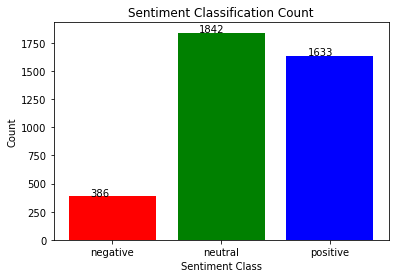

<IPython.core.display.Javascript object>

In [12]:
sntmnt_cnt = df.groupby("sentiment_class")["clean_text_lem"].count()

plt.bar(
    sntmnt_cnt.index, sntmnt_cnt.values, color=["red", "green", "blue"],
)
plt.xlabel("Sentiment Class")
plt.ylabel("Count")
plt.title("Sentiment Classification Count")
for i, v in enumerate(sntmnt_cnt.values):
    plt.text(i - 0.2, v + 5, str(v), color="black")

plt.show()

# <p style="background-color:green; font-family:calibri; font-size:120%; text-align:center;color:white" id="data">5. Splitting the Dataset into Train and Test</p>

<a id="dataprep"></a>


In [13]:
x = df["clean_text_lem"]
y = df["sentiment_class"]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y)

<IPython.core.display.Javascript object>

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2895,)
(2895,)
(966,)
(966,)


<IPython.core.display.Javascript object>

# <p style="background-color:green; font-family:calibri; font-size:120%; text-align:center;color:white" id="data">6. Feature engineering</p>

**Transforming Dataset using TF-IDF Vectorizer**

In [15]:
count_vect = CountVectorizer()
x_train_count = count_vect.fit_transform(x_train)
x_test_count = count_vect.transform(x_test)

<IPython.core.display.Javascript object>

The above code block is used to create a CountVectorizer object and use it to transform the data for both the training and the test sets. CountVectorizer is a method used for tokenizing and counting the frequency of words. It converts a collection of text documents to a matrix of token counts. The fit_transform() method is used on the training set to fit the CountVectorizer object to the data, and then transform it into a matrix of token counts. The transform() method is then used on the test set to transform it into a matrix of token counts.


---

In [16]:
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

<IPython.core.display.Javascript object>

The above code block is used to create a TfidfVectorizer object and use it to transform the data for both the training and the test sets. TfidfVectorizer is a method used for tokenizing and counting the frequency of words, with an additional weighting factor to reduce the importance of words that appear in many documents. It converts a collection of text documents to a matrix of token counts. The fit_transform() method is used on the training set to fit the TfidfVectorizer object to the data, and then transform it into a matrix of token counts. The transform() method is then used on the test set to transform it into a matrix of token counts.

---

**LOGISTIC REGRESSION**

In [17]:
lgcr = LogisticRegression()
lgcr.fit(x_train_tfidf, y_train)
pred_lgcr = lgcr.predict(x_test_tfidf)
score_lgcr = accuracy_score(y_test, pred_lgcr)
lgcr_cvScore = cross_val_score(lgcr, x_train_tfidf, y_train, cv=5)
print("Logistic Regression Accuracy: ", "{:.2f}%".format(100 * score_lgcr))
print(
    "\nLogistic Regresion cross validation score: ",
    "{:.2f}%".format(round(lgcr_cvScore.mean(), 2) * 100),
)

Logistic Regression Accuracy:  93.27%

Logistic Regresion cross validation score:  93.00%


<IPython.core.display.Javascript object>

The above block of code is doing Logistic Regression using Tfidf Vectorizer on the dataset. First the Logistic Regression model is fit on the train set using the x_train_tfidf and y_train. Then the model is used to predict the test set using x_test_tfidf and the accuracy is calculated using accuracy_score() and stored in score_lgcr. Then the model is cross validated using cross_val_score() and stored in lgcr_cvScore. Finally the accuracy and cross validation score is printed to the console.

---

C:\Users\HAdel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification Report:

              precision    recall  f1-score   support

    negative       0.75      1.00      0.85        76
     neutral       0.96      0.93      0.95       485
    positive       0.94      0.92      0.93       405

    accuracy                           0.93       966
   macro avg       0.88      0.95      0.91       966
weighted avg       0.94      0.93      0.93       966

                   Tweet
0  It was a normal Scene
Test Sentence Result:
['neutral']


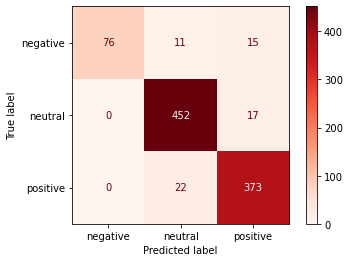

<IPython.core.display.Javascript object>

In [41]:
plot_confusion_matrix(lgcr, x_test_tfidf, y_test, cmap="Reds")
plt.grid(False)
print("Classification Report:\n")
print(classification_report(pred_lgcr, y_test))

Sentence = {"Tweet": ["It was a normal Scene"]}
singledf = pd.DataFrame(Sentence)
xsingledf = tfidf.transform(singledf)
print(singledf)
print("Test Sentence Result:")
results = lgcr.predict(xsingledf)
print(results)

The above block of code is used to predict a sentence using the Logistic Regression model. First a dataframe is created with the sentence to be predicted and then the tfidf vectorizer is used to transform the sentence. Then the model is used to predict the results using the lgcr.predict() function and the result is stored in the results variable. Finally the result is printed to the console.

---

**LINEAR SUPPORT VECTOR CLASSIFIER**

In [22]:
linearsvc = LinearSVC(penalty="l2", loss="hinge")
linearsvc.fit(x_train_tfidf, y_train)
prd_linearsvc = linearsvc.predict(x_test_tfidf)
score_linearsvc = accuracy_score(y_test, prd_linearsvc)
linearsvc_cvScore = cross_val_score(linearsvc, x_train_tfidf, y_train, cv=5)
print("Linear SVC Accuracy: ", "{:.2f}%".format(100 * score_linearsvc))
print(
    "\nLinear SVC Cross validation score: ",
    "{:.2f}%".format(round(linearsvc_cvScore.mean(), 2) * 100),
)

C:\Users\HAdel\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HAdel\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HAdel\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HAdel\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HAdel\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVC Accuracy:  94.93%

Linear SVC Cross validation score:  95.00%


C:\Users\HAdel\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<IPython.core.display.Javascript object>

Above block code is doing Linear SVC using Tfidf Vectorizer on the dataset. First the Linear SVC model is fit on the train set using the x_train_tfidf and y_train. Then the model is used to predict the test set using x_test_tfidf and the accuracy is calculated using accuracy_score() and stored in score_linearsvc. Then the model is cross validated using cross_val_score() and stored in linearsvc_cvScore. Finally the accuracy and cross validation score is illustrated as a matrix table

----

C:\Users\HAdel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification Report:

              precision    recall  f1-score   support

    negative       0.87      0.99      0.93        90
     neutral       0.97      0.94      0.96       485
    positive       0.94      0.95      0.95       391

    accuracy                           0.95       966
   macro avg       0.93      0.96      0.94       966
weighted avg       0.95      0.95      0.95       966

                  Tweet
0  It was a awful Scene
Test Sentence Result:
['neutral']


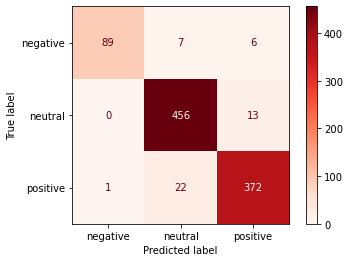

<IPython.core.display.Javascript object>

In [42]:
plot_confusion_matrix(linearsvc, x_test_tfidf, y_test, cmap="Reds")
plt.grid(False)
print("Classification Report:\n")
print(classification_report(prd_linearsvc, y_test))

Sentence = {"Tweet": ["It was a awful Scene"]}
singledf = pd.DataFrame(Sentence)
xsingledf = tfidf.transform(singledf)
print(singledf)
print("Test Sentence Result:")
results = linearsvc.predict(xsingledf)
print(results)

The Above block code is used to predict a sentence using the LinearSVC model. First a dataframe is created with the sentence to be predicted and then the tfidf vectorizer is used to transform the sentence. Then the model is used to predict the results using the linearsvc.predict() function and the result is stored in the resultsLS variable. Finally the result is illustrated as a confusion matrix table

---

**RANDOM FOREST**

**Model Validation**

In [25]:
parameters_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1, 50, 2),
}
model = sklearn.model_selection.GridSearchCV(
    sklearn.ensemble.RandomForestClassifier(),
    parameters_grid,
    scoring="accuracy",
    cv=5,
    verbose=2,
    n_jobs=-1,
)
model.fit(x_train_tfidf, y_train)
print("Accuracy of best RandomForest classfier = {:.2f}".format(model.best_score_))
print(
    "Best found Hyperparameters of RandomForest classifier ={}".format(
        model.best_params_
    )
)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Accuracy of best RandomForest classfier = 0.93
Best found Hyperparameters of RandomForest classifier ={'criterion': 'entropy', 'max_depth': 47}


<IPython.core.display.Javascript object>

This code implements a GridSearchCV to find the best hyperparameters for a Random Forest Classifier. The GridSearchCV object takes the Random Forest Classifier, and the parameters_grid dictionary specifying the parameters to be tested. It also specifies the scoring metric as accuracy, the number of cross-validation folds as 5, verbosity as 2 and the number of jobs to be used as -1. The model is then fitted on the training data (x_train_tfidf, y_train) and the best accuracy and the best hyperparameters are printed out.

---

**TEST MODEL**

In [26]:
y_predicted = model.predict(x_test_tfidf)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
accuracy = round(accuracy * 100, 2)
print("Accuracy of best RandomForest classfier = {:.2f}".format(accuracy))

Accuracy of best RandomForest classfier = 92.75


<IPython.core.display.Javascript object>

This code uses the model obtained from the GridSearchCV to make predictions on the test data (x_test_tfidf). The accuracy of the model is then calculated by comparing the predicted labels (y_predicted) with the actual labels (y_test) using the sklearn.metrics.accuracy_score function. The accuracy is then rounded to two decimal places and is printed out.

C:\Users\HAdel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification Report:

              precision    recall  f1-score   support

    negative       0.79      1.00      0.89        81
     neutral       0.99      0.90      0.94       515
    positive       0.89      0.95      0.92       370

    accuracy                           0.93       966
   macro avg       0.89      0.95      0.92       966
weighted avg       0.93      0.93      0.93       966

       Tweet
0  bad movie
Test Sentence Result:
['neutral']


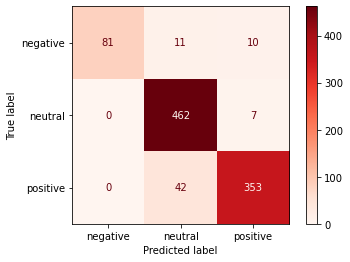

<IPython.core.display.Javascript object>

In [43]:
plot_confusion_matrix(model, x_test_tfidf, y_test, cmap="Reds")
plt.grid(False)
print("Classification Report:\n")
print(classification_report(y_predicted, y_test))

Sentence = {"Tweet": ["bad movie"]}
singledf = pd.DataFrame(Sentence)
xsingledf = tfidf.transform(singledf)
print(singledf)
print("Test Sentence Result:")
results = model.predict(xsingledf)
print(results)

# <p style="background-color:green; font-family:calibri; font-size:120%; text-align:center;color:white" id="data"> 9. Conclusion</p>


The assignment is about developing a machine learning pipeline to collect public tweets and apply machine learning techniques to analyze the sentiment of the tweets. The scrapped tweets are stored in a data frame.

The dataset was used to analyze the sentiments of the tweets and identify the positive, negative, and neutral sentiments of the tweets. The data gathered from this pipeline was used to inform businesses about public opinions on their products and services, and to develop machine learning models for sentiment analysis.

Three algorithms were used to perform sentiment analysis: logistic regression, support vector machine, and random forests. Each algorithm has its own strengths and weaknesses. Logistic regression in this pipeline was the easiest to implement and provided a robust performance across all datasets. Support vector machine did a better job compared to logistic regression on datasets with many features, but it was slower to train. Random forests provide the best performance, but it requires more computational power than the other two algorithms.

Overall, this project has provided a valuable tool for businesses to gain insight from public opinions about their products and services. Through sentiment analysis of tweets, companies can better understand how their products and services are being pereceived by the public and make decisions about their overall marketing strategy. Furthermore, the data gathered from this pipeline can be used in the development of machine learning models to automate this task for continuous improvment.

# <p style="background-color:green; font-family:calibri; font-size:120%; text-align:center;color:white" id="data"> 10. References</p>

1. Lewis, C. (2021) Spacy basics: The importance of tokens in Natural Language Processing, Medium. Analytics Vidhya. Available at: https://medium.com/analytics-vidhya/spacy-basics-the-importance-of-tokens-in-natural-language-processing-89a698d8a76#:~:text=Before%20processing%20a%20natural%20language%2C%20we%2 (Accessed: December 10, 2022).
2. Tutorialforbeginner.com (no date) Support Vector Machine algorithm, www.tutorialforbeginner.com. Available at: https://tutorialforbeginner.com/support-vector-machine-algorithm#:~:text=The%20Support%20Vector%20 (Accessed: December 15, 2022). 
3. Tweet object | docs | twitter developer platform (no date) Twitter. Twitter. Available at: https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/tweet (Accessed: December 05, 2022). 
